In [1]:
# load required libraries
library(tidyverse)
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
source("../R/apply_factors.R")

tables <- list(
    Orders = readr::read_csv("../data/processed/Orders.csv"),
    Returns = readr::read_csv("../data/processed/Returns.csv"),
    People = readr::read_csv("../data/processed/People.csv")
)

tables <- apply_factors(tables)

orders <- tables$Orders

Rows: 51290 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): order_id, ship_mode, customer_name, segment, state, country, mark...
dbl   (6): sales, quantity, discount, profit, shipping_cost, year
date  (2): order_date, ship_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1173 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): order_id, market
lgl (1): returned

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 14 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): person, region

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the co

In [3]:
# quick structure check
glimpse(orders)

Rows: 51,290
Columns: 21
$ order_id       <chr> "AG-2011-2040", "IN-2011-47883", "HU-2011-1220", "IT-20…
$ order_date     <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-0…
$ ship_date      <date> 2011-01-06, 2011-01-08, 2011-01-05, 2011-01-05, 2011-0…
$ ship_mode      <fct> Standard Class, Standard Class, Second Class, Second Cl…
$ customer_name  <chr> "Toby Braunhardt", "Joseph Holt", "Annie Thurman", "Eug…
$ segment        <fct> Consumer, Consumer, Consumer, Home Office, Consumer, Co…
$ state          <fct> Constantine, New South Wales, Budapest, Stockholm, New …
$ country        <fct> Algeria, Australia, Hungary, Sweden, Australia, Austral…
$ market         <fct> Africa, APAC, EMEA, EU, APAC, APAC, Canada, APAC, APAC,…
$ region         <fct> Africa, Oceania, EMEA, North, Oceania, Oceania, Canada,…
$ product_id     <chr> "OFF-TEN-10000025", "OFF-SU-10000618", "OFF-TEN-1000158…
$ category       <fct> Office Supplies, Office Supplies, Office Supplies, Offi…
$ sub_category 

In [4]:
skimr::skim(orders) %>% print()

── Data Summary ────────────────────────
                           Values
Name                       orders
Number of rows             51290 
Number of columns          21    
_______________________          
Column type frequency:           
  character                4     
  Date                     2     
  factor                   9     
  numeric                  6     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 order_id              0             1   9  15     0    25035          0
2 customer_name         0             1   7  22     0      795          0
3 product_id            0             1  15  16     0    10292          0
4 product_name          0             1   5 127     0     3788          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n

I separate numeric and categorical columns because the statistical analysis will depend on it. For instance, for numeric variables we can check range, quantile, outlier, distribution shape etc., while for categorical we check frequency distributions.

In [5]:
numeric_vars <- orders %>% 
    select(where(is.numeric))

categorical_vars <- orders %>% 
    select(where(is.factor))

list(
    numeric_columns = names(numeric_vars),
    categorical_columns = names(categorical_vars)
)

$numeric_columns
[1] "sales"         "quantity"      "discount"      "profit"       
[5] "shipping_cost" "year"         

$categorical_columns
[1] "ship_mode"      "segment"        "state"          "country"       
[5] "market"         "region"         "category"       "sub_category"  
[9] "order_priority"

In [15]:
# central tendency and dispersion
primary_numeric_vars <- c("sales", "quantity", "profit")
secondary_numeric_vars <- setdiff(names(numeric_vars), primary_numeric_vars)

primary_numeric_summary <- numeric_vars %>%  
    summarise(
        across(    
            all_of(primary_numeric_vars),    
            list(      
                mean = mean,      
                median = median,      
                sd = sd,      
                min = min,      
                max = max    
            ),    
            na.rm = TRUE  
        )
    )

primary_numeric_summary

secondary_numeric_summary <- numeric_vars %>%  
    summarise(
        across(    
            all_of(secondary_numeric_vars),    
            list(      
                mean = mean,      
                median = median,      
                sd = sd,      
                min = min,      
                max = max    
            ),    
            na.rm = TRUE  
        )
    )

secondary_numeric_summary

sales_mean,sales_median,sales_sd,sales_min,sales_max,quantity_mean,quantity_median,quantity_sd,quantity_min,quantity_max,profit_mean,profit_median,profit_sd,profit_min,profit_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
246.4906,85.053,487.5654,0.444,22638.48,3.476545,3,2.278766,1,14,28.64174,9.24,174.4241,-6599.978,8399.976


discount_mean,discount_median,discount_sd,discount_min,discount_max,shipping_cost_mean,shipping_cost_median,shipping_cost_sd,shipping_cost_min,shipping_cost_max,year_mean,year_median,year_sd,year_min,year_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1429075,0,0.2122799,0,0.85,26.37582,7.79,57.29681,0.002,933.57,2012.777,2013,1.098931,2011,2014


In [7]:
# quantiles & ranges
quantiles <- numeric_vars %>%  
    summarise(
        across(    
            everything(),    
            ~ quantile(.x, probs = c(0, 0.25, 0.5, 0.75, 1), na.rm = TRUE),    
            .names = "{.col}_quantiles"  
        )
    )

quantiles

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


sales_quantiles,quantity_quantiles,discount_quantiles,profit_quantiles,shipping_cost_quantiles,year_quantiles
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.44400,1,0.00,-6599.978,0.002,2011
30.75863,2,0.00,0.000,2.610,2012
85.05300,3,0.00,9.240,7.790,2013
251.05320,5,0.20,36.810,24.450,2014
22638.48000,14,0.85,8399.976,933.570,2014


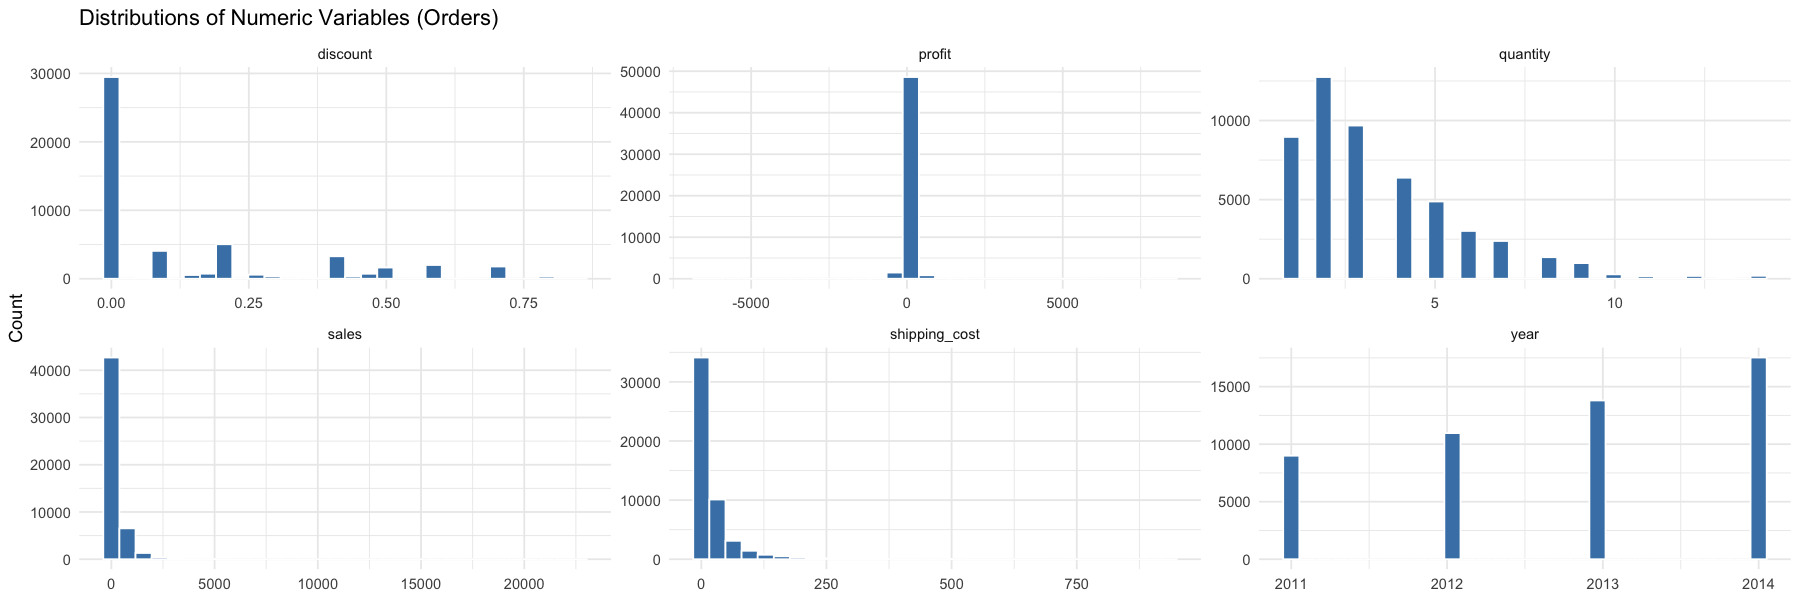

In [8]:
# distribution shape
options(repr.plot.width = 15, repr.plot.height = 5)

numeric_vars %>%  
    pivot_longer(everything()) %>%  
    ggplot(aes(value)) +  
    geom_histogram(bins = 30, fill = "steelblue", color = "white") +  
    facet_wrap(~name, scales = "free") +  
    theme_minimal() +  
    labs(    
        title = "Distributions of Numeric Variables (Orders)",    
        x = NULL,    
        y = "Count"  
    )

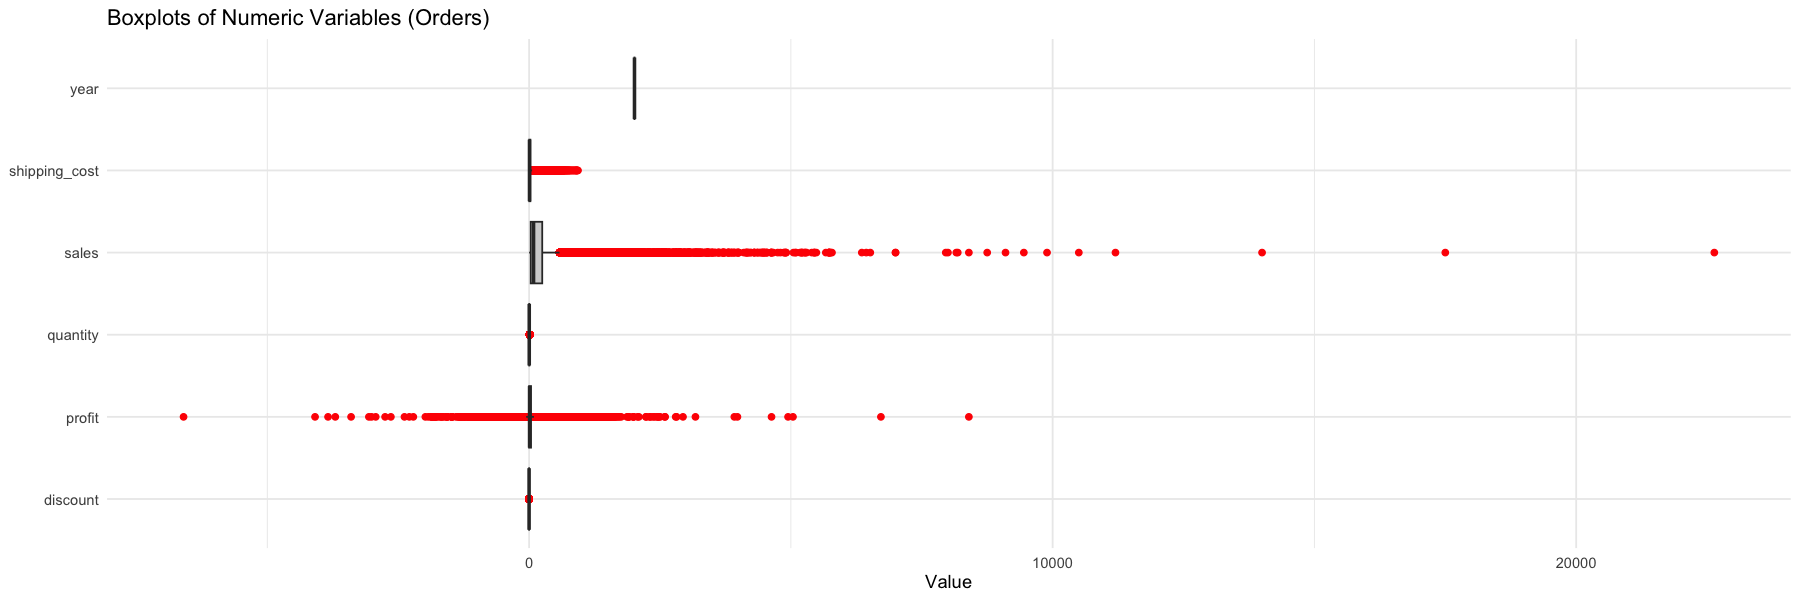

In [9]:
# boxplots for dispersion and outliers
numeric_vars %>%  
    pivot_longer(everything()) %>%  
    ggplot(aes(x = name, y = value)) +  
    geom_boxplot(outlier.color = "red", fill = "lightgray") +  
    coord_flip() +  
    theme_minimal() +  
    labs(    
        title = "Boxplots of Numeric Variables (Orders)",    
        x = NULL,    
        y = "Value"  
    )

In [10]:
# identify outliers
detect_outliers <- function(x) {
    q1 <- quantile(x, 0.25, na.rm = TRUE)
    q3 <- quantile(x, 0.75, na.rm = TRUE)
    iqr <- q3 - q1
    sum(x < (q1 - 1.5 * iqr) | x > (q3 + 1.5 * iqr), na.rm = TRUE)
}

outlier_counts <- numeric_vars %>%  
    summarise(across(everything(), detect_outliers))

outlier_counts

sales,quantity,discount,profit,shipping_cost,year
<int>,<int>,<int>,<int>,<int>,<int>
5655,877,4172,9755,5909,0


In [11]:
# categorical variable frequencies
categorical_vars %>%  
    map(~ count(tibble(value = .x), value, sort = TRUE))

value,n
<fct>,<int>
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701
value,n
<fct>,<int>
Consumer,26518
Corporate,15429
Home Office,9343


In [13]:
executive_summary <- orders %>%  
    summarise(    
        total_orders = n(),    
        total_sales = sum(sales, na.rm = TRUE),    
        total_profit = sum(profit, na.rm = TRUE),    
        avg_sales = mean(sales, na.rm = TRUE),    
        avg_profit = mean(profit, na.rm = TRUE),    
        median_sales = median(sales, na.rm = TRUE),    
        median_profit = median(profit, na.rm = TRUE),    
        overall_margin = total_profit / total_sales  
    ) %>%  
    mutate(    
        total_sales = round(total_sales, 2),    
        total_profit = round(total_profit, 2),    
        avg_sales = round(avg_sales, 2),    
        avg_profit = round(avg_profit, 2),    
        median_sales = round(median_sales, 2),    
        median_profit = round(median_profit, 2),    
        overall_margin = round(overall_margin * 100, 2)  
    )

In [14]:
executive_summary

total_orders,total_sales,total_profit,avg_sales,avg_profit,median_sales,median_profit,overall_margin
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51290,12642502,1469035,246.49,28.64,85.05,9.24,11.62
